# Solar PV Simulation Workflow

In [1]:
import reskit as rk
from reskit import solarpower

%matplotlib inline

---
## Single Location

In [2]:
# Constants
LOC = (6.0,50.5)   # Given in longitude, latitude
ELEV = 100         # Elevation given in meters

In [4]:
# Load Weather Data
SOURCE = rk.weather.sources.MerraSource(
    rk._TEST_DATA_['weather_data'], # Path to climate model weather data (MERRA2)
    bounds=[5,49,7,52],
)

SOURCE.loadRadiation()
SOURCE.loadPressure()
SOURCE.loadTemperature()
SOURCE.loadWindSpeed(10)

c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.PS.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.SWGDN.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T10M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T2MDEW.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U10M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U50M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.V10M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.V2M.nc4
c:\users\s.ryberg\fzj\

In [5]:
# Do simulation
out = solarpower.simulatePVModule(LOC, SOURCE, ELEV,
                                  module='1Soltech 1STH-345-WH', # Module to use for simulation
                                  azimuth=160,                   # Azimuth of system [degrees]
                                  tilt=44,                       # Tilt of system [degrees]
                                  totalSystemCapacity=7500,      # Nameplate capacity [kW]
                                  tracking='fixed'               # Tracking capability ['fixed' or 'single-axis']
                                 )

out.head(24)

c:\users\s.ryberg\fzj\repos\res\reskit\solarpower\_pv.py:162: RuntimeWarning: divide by zero encountered in true_divide
  kt_prime = kt / (1.031 * np.exp(-1.4 / (0.9 + 9.4 / am)) + 0.1)


,"(6.00000,50.50000)"
2015-01-01 00:30:00.000013+00:00,0.000000
2015-01-01 01:30:00+00:00,0.000000
2015-01-01 02:30:00.000026+00:00,0.000000
2015-01-01 03:30:00.000013+00:00,0.000000
2015-01-01 04:30:00+00:00,0.000000
2015-01-01 05:30:00.000026+00:00,0.000000
2015-01-01 06:30:00.000013+00:00,0.000000
2015-01-01 07:30:00+00:00,11.554459
2015-01-01 08:30:00.000026+00:00,1226.603512
2015-01-01 09:30:00.000013+00:00,3674.939935


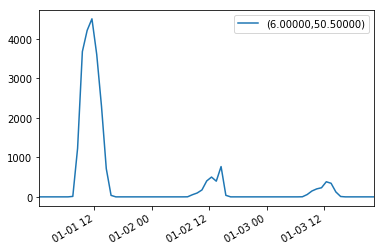

In [6]:
out.plot()

---
## Multiple Locations

In [7]:
# Constants
LOCS = [(6.0,50.5),
       (6.1,50.5),
       (6.2,50.5),
       (6.3,50.5),]

ELEVS = [100,100,200,300]

# tilts could be defined for each location as well...
# azimuths could be defined for each location as well...
# Name plate capacities could be defined for each location as well...

In [8]:
# Do simulation
out = solarpower.simulatePVModule(LOCS, SOURCE, ELEVS,
                                  module='1Soltech 1STH-345-WH', # Module to use for simulation
                                  azimuth=160,                   # Azimuth of system [degrees]
                                  tilt=44,                       # Tilt of system [degrees]
                                  totalSystemCapacity=7500,      # Nameplate capacity [kW]
                                  tracking='fixed'               # Tracking capability ['fixed' or 'single-axis']
                                 )

out.head(24)

,"(6.00000,50.50000)","(6.10000,50.50000)","(6.20000,50.50000)","(6.30000,50.50000)"
2015-01-01 00:30:00.000013+00:00,0.000000,0.000000,0.000000,0.000000
2015-01-01 01:30:00+00:00,0.000000,0.000000,0.000000,0.000000
2015-01-01 02:30:00.000026+00:00,0.000000,0.000000,0.000000,0.000000
2015-01-01 03:30:00.000013+00:00,0.000000,0.000000,0.000000,0.000000
2015-01-01 04:30:00+00:00,0.000000,0.000000,0.000000,0.000000
2015-01-01 05:30:00.000026+00:00,0.000000,0.000000,0.000000,0.000000
2015-01-01 06:30:00.000013+00:00,0.000000,0.000000,0.000000,0.000000
2015-01-01 07:30:00+00:00,11.554460,12.509720,13.469283,14.595128
2015-01-01 08:30:00.000026+00:00,1226.603601,1303.364476,1380.080320,1462.700032
2015-01-01 09:30:00.000013+00:00,3674.940607,3691.656229,3850.253227,3872.486109


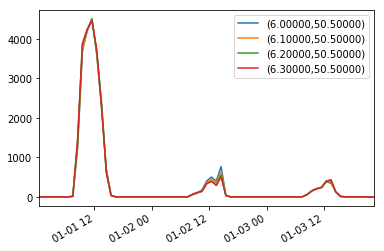

In [9]:
out.plot()

---
## Simulate multiple designs at a location, and average generation values
- Such as when you will simulate multiple rooftop PV systems

In [10]:
# Constants
LOC = (6.0,50.5)
ELEV = 100

# Tilts and Azimuths are given as a 1-dimensional array
TILTS = [ 0, 0, 0,
         10,10,10,
         25,25,25]

AZIMUTHS = [160,180,200,
            160,180,200,
            160,180,200,]

# Occurences could be set for each tilt+azimuth combination, otherwise they are assumed to be equally distributed

In [11]:
out = solarpower.simulatePVModuleDistribution(LOC,
                                              elev=ELEV,
                                              source=SOURCE,
                                              tilts=TILTS,
                                              azimuths=AZIMUTHS,
                                              module='1Soltech 1STH-345-WH',
                                             )

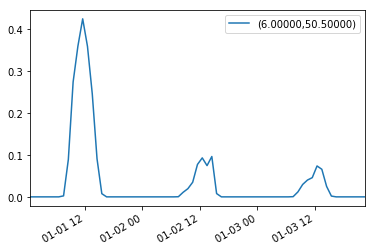

In [12]:
out.plot()